### DS106-Machine Learning Lesson 3 Hands on Helper

#### Import packages

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings

#### Let's see if the amount, male or female, day of the week, and cost of the bill at the restaurant has anything to do with the tips!!

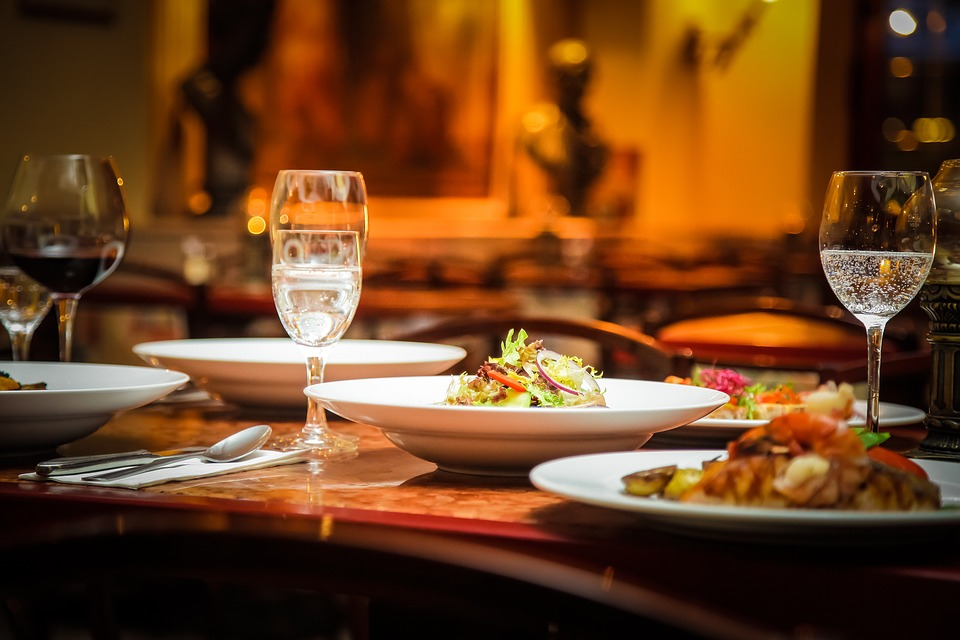

In [138]:
Tips = sns.load_dataset('tips')

In [139]:
Tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [140]:
Tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
Tips.drop(['time'], axis=1, inplace=True)

#### Data Wrangling

#### Recode to intergers

In [142]:
Recode = {"sex": {"Male": 0, "Female": 1},  
           "day": {"Mon": 1, "Tues": 2, "Wed": 3, "Thur": 4, "Fri": 5, "Sat": 6, "Sun": 7},
           "time":{"Dinner": 0, "Lunch": 1}}           
Tips.replace(Recode, inplace=True)

#### Drop columns we don't need.

In [143]:
Tips.drop(['smoker'], axis=1, inplace=True)

In [144]:
Tips.head()

,total_bill,tip,sex,day,size
0,16.99,1.01,1,7,2
1,10.34,1.66,0,7,3
2,21.01,3.50,0,7,3
3,23.68,3.31,0,7,2
4,24.59,3.61,1,7,4


#### Changing floats to intergers

In [145]:
Tips['total_bill'] = Tips['total_bill'].apply(int)
Tips['tip'] = Tips['tip'].apply(int)

In [146]:
Tips.tail()

,total_bill,tip,sex,day,size
239,29,5,0,6,3
240,27,2,1,6,2
241,22,2,0,6,2
242,17,1,0,6,2
243,18,3,1,4,2


In [147]:
x = Tips.drop('tip', axis=1)
y = Tips['tip']

#### Train/Test Data

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=76)

#### Decision Tree

In [149]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [150]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[ 7  2  1  0  0  0  0  0]
 [ 6 13  1  4  0  0  0  0]
 [ 6  4  8  3  0  0  0  0]
 [ 2  2  5  0  0  0  0  0]
 [ 0  1  2  0  1  0  0  1]
 [ 0  0  0  2  1  0  0  1]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.33      0.70      0.45        10
           2       0.59      0.54      0.57        24
           3       0.44      0.38      0.41        21
           4       0.00      0.00      0.00         9
           5       0.50      0.20      0.29         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

    accuracy                           0.39        74
   macro avg       0.23      0.23      0.21        74
weighted avg       0.40      0.39      0.38        74



c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and 

#### Random Forrest

In [151]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [152]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 7  1  2  0  0  0  0  0]
 [ 2 12  4  6  0  0  0  0]
 [ 1  6  8  4  2  0  0  0]
 [ 2  3  3  1  0  0  0  0]
 [ 0  1  2  0  1  0  0  1]
 [ 0  1  0  1  1  0  0  1]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.58      0.70      0.64        10
           2       0.50      0.50      0.50        24
           3       0.40      0.38      0.39        21
           4       0.08      0.11      0.10         9
           5       0.25      0.20      0.22         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

    accuracy                           0.39        74
   macro avg       0.23      0.24      0.23        74
weighted avg       0.38      0.39      0.39        74



c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and 

### Analysis

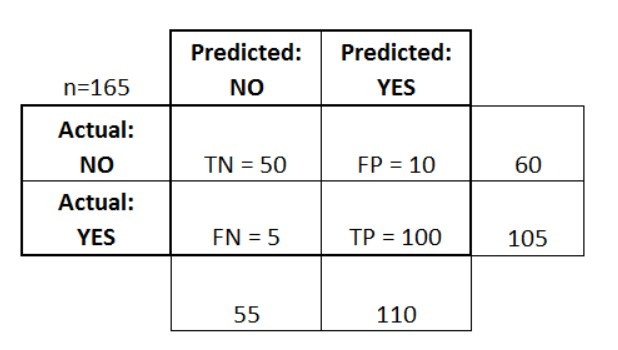

In [153]:
Tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    int64   
 1   tip         244 non-null    int64   
 2   sex         244 non-null    category
 3   day         244 non-null    category
 4   size        244 non-null    int64   
dtypes: category(2), int64(3)
memory usage: 6.6 KB


#### Exercise

Try doing the math for your confusion matrix to see the accuracy report!!




Accuracy is (TP+TN)/total = (12+7)/244 = 0.48
What do you think is 48% a good prediction score? Definitely not.

What about our Misclassification Rate?
Overall, how often is it wrong?
(FP+FN)/total = (10+1)/244 =

What about our True Positive Rate?
When it's actually yes, how often does it predict yes...
TP/actual yes = 100/105 = 

False Positive Rate:
When it's actually no, how often does it predict yes?
FP/actual no = 10/60 =  

True Negative Rate: When it's actually no, how often does it predict no?
TN/actual no = 50/60 = 

Precision: When it predicts yes, how often is it correct?
TP/predicted yes = 100/110 =


